# SVM classifier in Udacity Introduction to Machine Learning Course

This is a copy from the Naive Bayes classifier but instead of that classifier we implement SVM with a linear kernel.

## Program to generate and prepare data

The problem is to design a classifier that help us to decide the speed of a car based on the terrain's characteristics, namely its slop and bumpiness:

<img src="../01-NaiveBayes/Images/ScatterPlots.png">

The first function generate random data to train our classifier.

In [17]:
import random

def makeTerrainData(n_points=1000):
###############################################################################
### make the toy dataset
    random.seed(42)
    grade = [random.random() for ii in range(0,n_points)]
    bumpy = [random.random() for ii in range(0,n_points)]
    error = [random.random() for ii in range(0,n_points)]
    y = [round(grade[ii]*bumpy[ii]+0.3+0.1*error[ii]) for ii in range(0,n_points)]
    for ii in range(0, len(y)):
        if grade[ii]>0.8 or bumpy[ii]>0.8:
            y[ii] = 1.0

### split into train/test sets
    X = [[gg, ss] for gg, ss in zip(grade, bumpy)]
    split = int(0.75*n_points)
    X_train = X[0:split]
    X_test  = X[split:]
    y_train = y[0:split]
    y_test  = y[split:]

    grade_sig = [X_train[ii][0] for ii in range(0, len(X_train)) if y_train[ii]==0]
    bumpy_sig = [X_train[ii][1] for ii in range(0, len(X_train)) if y_train[ii]==0]
    grade_bkg = [X_train[ii][0] for ii in range(0, len(X_train)) if y_train[ii]==1]
    bumpy_bkg = [X_train[ii][1] for ii in range(0, len(X_train)) if y_train[ii]==1]

#    training_data = {"fast":{"grade":grade_sig, "bumpiness":bumpy_sig}
#            , "slow":{"grade":grade_bkg, "bumpiness":bumpy_bkg}}


    grade_sig = [X_test[ii][0] for ii in range(0, len(X_test)) if y_test[ii]==0]
    bumpy_sig = [X_test[ii][1] for ii in range(0, len(X_test)) if y_test[ii]==0]
    grade_bkg = [X_test[ii][0] for ii in range(0, len(X_test)) if y_test[ii]==1]
    bumpy_bkg = [X_test[ii][1] for ii in range(0, len(X_test)) if y_test[ii]==1]

    test_data = {"fast":{"grade":grade_sig, "bumpiness":bumpy_sig}
            , "slow":{"grade":grade_bkg, "bumpiness":bumpy_bkg}}

    return X_train, y_train, X_test, y_test
#    return training_data, test_data

## Visualization Function

In [19]:
## Visualization Function

#This pair of functions are used to format our output graph.
#The prettyPicture function not only receives the input data but it also receives the classifiers in order to change the point in the graph in accord to its class.

#from udacityplots import *
import warnings
warnings.filterwarnings("ignore")

import matplotlib 
matplotlib.use('agg')

import matplotlib.pyplot as plt
import pylab as pl
import numpy as np

#import numpy as np
#import matplotlib.pyplot as plt
#plt.ioff()

def prettyPicture(clf, X_test, y_test):
    x_min = 0.0; x_max = 1.0
    y_min = 0.0; y_max = 1.0

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    h = .01  # step size in the mesh
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    plt.pcolormesh(xx, yy, Z, cmap=pl.cm.seismic)

    # Plot also the test points
    grade_sig = [X_test[ii][0] for ii in range(0, len(X_test)) if y_test[ii]==0]
    bumpy_sig = [X_test[ii][1] for ii in range(0, len(X_test)) if y_test[ii]==0]
    grade_bkg = [X_test[ii][0] for ii in range(0, len(X_test)) if y_test[ii]==1]
    bumpy_bkg = [X_test[ii][1] for ii in range(0, len(X_test)) if y_test[ii]==1]

    plt.scatter(grade_sig, bumpy_sig, color = "b", label="fast")
    plt.scatter(grade_bkg, bumpy_bkg, color = "r", label="slow")
    plt.legend()
    plt.xlabel("bumpiness")
    plt.ylabel("grade")

    plt.savefig("test.png")
    
import base64
import json
import subprocess

def output_image(name, format, bytes):
    image_start = "BEGIN_IMAGE_f9825uweof8jw9fj4r8"
    image_end = "END_IMAGE_0238jfw08fjsiufhw8frs"
    data = {}
    data['name'] = name
    data['format'] = format
    data['bytes'] = base64.encodestring(bytes)
    print image_start+json.dumps(data)+image_end

## SVM Classifier

The most basic implementation of a SVM, using a linear kernel

In [18]:
def classify(features_train, labels_train):   
    ### import the sklearn module for SVM
    from sklearn.svm import SVC
    ### create classifier
    clf = SVC(kernel="linear")
    ### fit the classifier on the training features and labels
    clf.fit(features_train, labels_train)
    ### return the fit classifier
    return clf

def classify2(features_train, labels_train):   
    ### import the sklearn module for SVM
    from sklearn.svm import SVC
    ### create classifier
    clf = SVC(kernel="rbf", gamma=100, C = 10)
    # C: controls tradeoff between smooth decision boundary and classifying training points correctly
    # gamma: defines how far the influence of a single training example reaches
    ### fit the classifier on the training features and labels
    clf.fit(features_train, labels_train)
    ### return the fit classifier
    return clf

## The main function

We are going to take the same visualization and data preprocessing functions as in the NaiveBayes classifier.
The program basically creates an SVM classifier with a linear kernel, then fit the data and obtains the accuracy score.

Accuracy (method 1): 0.944
Accuracy (method 2): 0.944


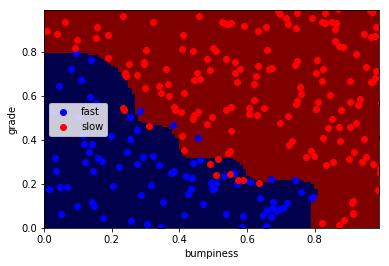

In [20]:
%matplotlib inline


import matplotlib.pyplot as plt
import copy
import numpy as np
import pylab as pl

features_train, labels_train, features_test, labels_test = makeTerrainData()


########################## SVM #################################

# Creating and training our classifier
#clf = classify(features_train, labels_train)
clf = classify2(features_train, labels_train)   # A classifier with rbf kernel and different gamma and C values...


# Accuracy Method 1
print "Accuracy (method 1):", clf.score(features_test,labels_test)

# Accuracy Method 2
from sklearn.metrics import accuracy_score
pred = clf.predict(features_test)
print "Accuracy (method 2):", accuracy_score(pred, labels_test)

### draw the decision boundary with the text points overlaid
prettyPicture(clf, features_test, labels_test)
    

## Final comment

As we can see in the image above, the frontier between the classes is a straight line. That's because we are using a linear kernel. 
